In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

In [3]:
# Generate random values for x and y
x = np.random.uniform(low=-10, high=10, size=100)
y = np.random.uniform(low=-10, high=10, size=100)

In [4]:
# Define logistic polynomial function
def logistic_polynomial(x, y):
    return 1 / (1 + np.exp(-(3*x + 2*y - 10)))

In [5]:
# Apply logistic polynomial function to x and y to generate class labels
z = logistic_polynomial(x, y)
classes = np.where(z > 0.5, 1, 0)

In [6]:
# Combine x, y, and class labels into a single array
data = np.vstack([x, y, classes]).T

In [7]:
# Define the column names
column_names = {0: 'x', 1: 'y', 2: 'class'}

In [8]:
# Create a structured array with named columns
data = np.core.records.fromarrays(data.T, names=','.join(column_names.values()))

In [9]:
# Print the first 10 rows of the generated data
print(data[:10])

[( 3.92938371,  0.26256308, 1.) (-4.2772133 ,  3.332491  , 0.)
 (-5.46297093, -7.8818303 , 0.) ( 1.02629538, -7.38210099, 0.)
 ( 4.3893794 , -3.56038787, 0.) (-1.5378708 ,  3.23128673, 0.)
 ( 9.61528397,  6.93012451, 1.) ( 3.69659477,  1.0651469 , 1.)
 (-0.38136197,  7.08904975, 1.) (-2.15764964, -2.30324377, 0.)]


In [10]:
# Combine x, y, and class labels into a single array
data = np.vstack([x, y, classes]).T

In [11]:
# Define the column names
column_names = ['x', 'y', 'class']

In [12]:
# Create a pandas DataFrame with named columns
df = pd.DataFrame(data, columns=column_names)

In [13]:
# Print the first 10 rows of the generated data
print(df.head(10))

          x         y  class
0  3.929384  0.262563    1.0
1 -4.277213  3.332491    0.0
2 -5.462971 -7.881830    0.0
3  1.026295 -7.382101    0.0
4  4.389379 -3.560388    0.0
5 -1.537871  3.231287    0.0
6  9.615284  6.930125    1.0
7  3.696595  1.065147    1.0
8 -0.381362  7.089050    1.0
9 -2.157650 -2.303244    0.0


In [14]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

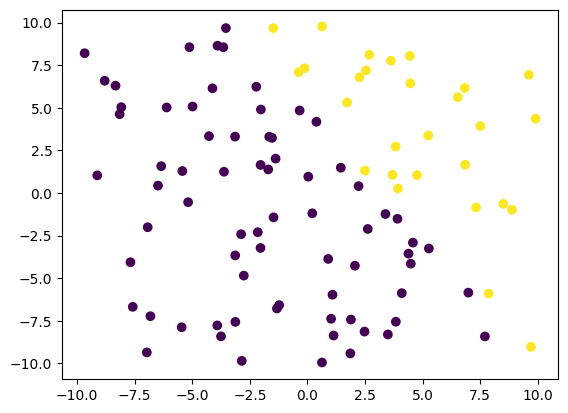

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [16]:
#create data till yet

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [18]:
clf.fit(X,y)

LogisticRegression()

<AxesSubplot:>

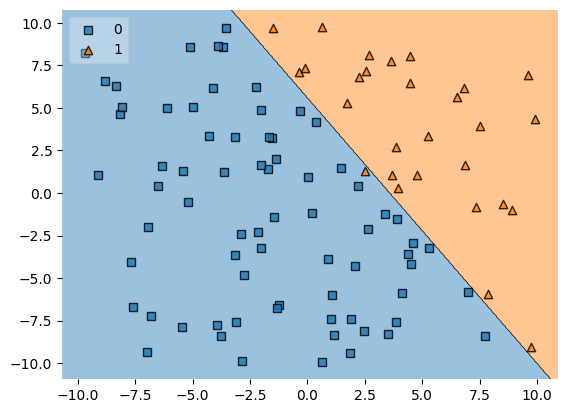

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [20]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.9800000000000001

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [22]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.9800000000000001

In [23]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

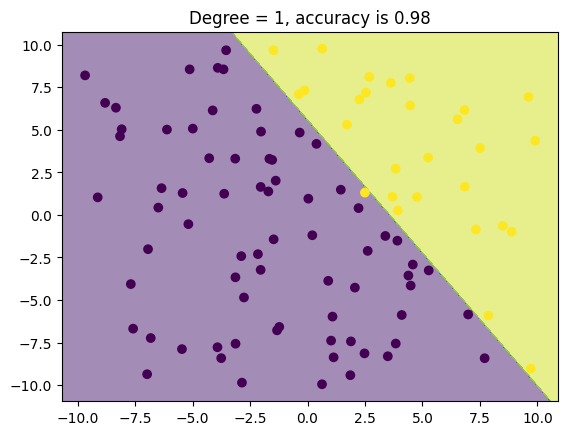

In [24]:
plot_decision_boundary(X,y)

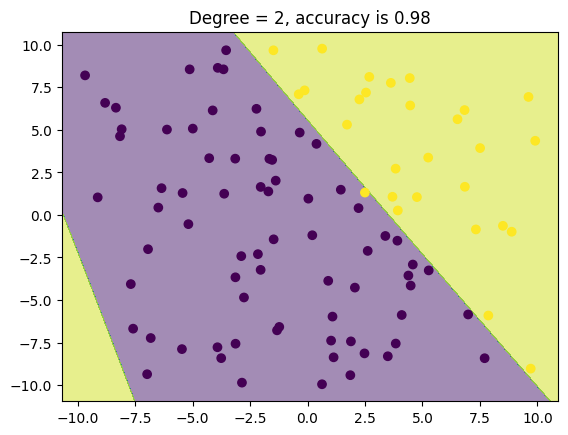

In [25]:
plot_decision_boundary(X,y,degree=2)

C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

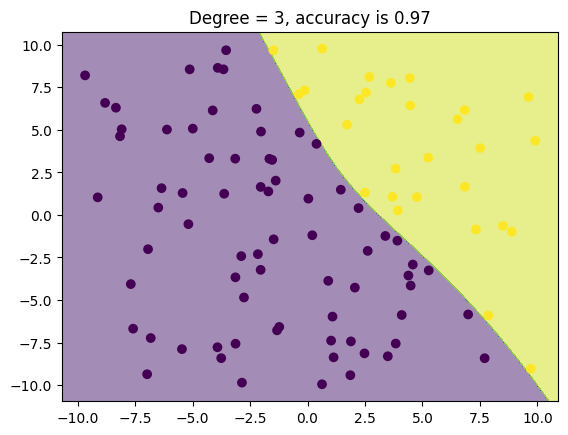

In [26]:
plot_decision_boundary(X,y,degree=3)

C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

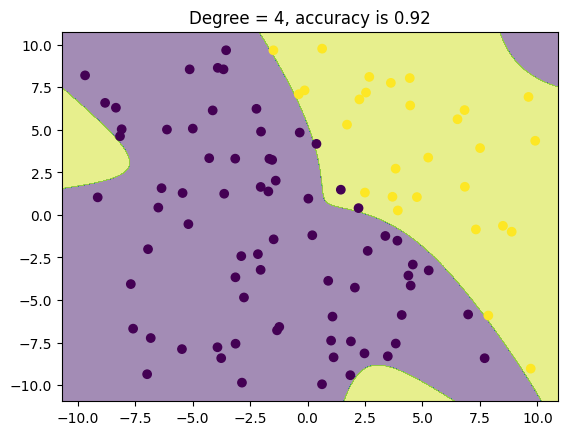

In [27]:
plot_decision_boundary(X,y,degree=4)

In [ ]:
plot_decision_boundary(X,y,degree=5)

In [ ]:
plot_decision_boundary(X,y,degree=6)

In [ ]:
plot_decision_boundary(X,y,degree=25)